### Regressão Linear Múltipla para previsão do preço de venda dos carros

Neste modelo utilizamos um conjunto de dados de carros usados listados pelo site www.cardekho.com e disponível em: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho adaptado.
Ao fim deste modelo temos o objetivo de conseguir prever o preço de venda dos carros listado neste conjunto de dados.

As informações contidas no dataset são:

**nome_carro:**        nome do carro

**ano:**               ano de fabricação

**preco_venda:**       preço que o dono quer vender

**preco_atual:**       preço da concessionária

**kms_rodados:**       kilometragem do carro 

**tipo_combustivel:**  tipo de combustível do carro (Diesel, Gasolina, GasNatural)

**tipo_vendedor:**     se o vendedor é um revendedor ou é a própria pessoa

**tipo_transmissao:**  tipo de câmbio do carro

**n_donos:**           número de donos que o carro já teve

### Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Carregando os dados

In [3]:
df = pd.read_csv("car_data.csv")

# Aqui nos mostramos as primeiras linhas do conjunto de dados.
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,Gasolina,Revendedor,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Revendedor,Manual,0
2,ciaz,2017,7.25,9.85,6900,Gasolina,Revendedor,Manual,0
3,wagon r,2011,2.85,4.15,5200,Gasolina,Revendedor,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Revendedor,Manual,0


Neste trecho por se tratar de um modelo de Regressão Linear, vamos substituir alguns dados que possuem textos por números. 

In [4]:
df['tipo_transmissao'].replace({'Manual': 0, 'Automatico': 1}, inplace=True)
df['tipo_vendedor'].replace({'Revendedor': 0, 'Individual': 1}, inplace=True)
df['tipo_combustivel'].replace({'Gasolina': 0, 'Diesel': 1, 'GasNatural': 2}, inplace=True)
df.head()

,nome_carro,ano,preco_venda,preco_atual,kms_rodados,tipo_combustivel,tipo_vendedor,tipo_transmissao,n_donos
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Aqui vamos plotar em um gráfico os anos do carros versus o preço de venda.

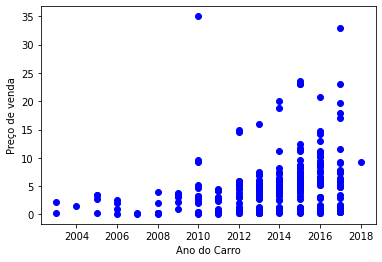

In [5]:
plt.scatter(df['ano'], df['preco_venda'],  color='blue')
plt.xlabel("Ano do Carro")
plt.ylabel("Preço de venda")
plt.show()

Agora vamos ver qual os anos dos carros que mais rodaram

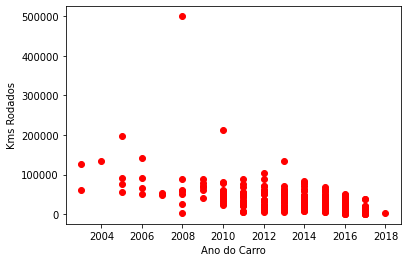

In [6]:
plt.scatter(df['ano'], df['kms_rodados'],  color='red')
plt.xlabel("Ano do Carro")
plt.ylabel("Kms Rodados")
plt.show()

Separação das em variáveis dependentes e variáveis independentes

In [7]:
#Escolha das variáveis independentes 
x = df[['ano', 'preco_atual', 'kms_rodados', 'tipo_combustivel']]

In [8]:
# Variável dependente
y = df[['preco_venda']]

###Divisão dos dados em treino e teste

Para construir nosso modelo de Machine Learning precisamos dividir os dados em duas partes que são o conjunto de dados de treino e o conjunto de dados de teste. Para isso iremos separar 80% dos dados para treino e 20%
dos dados para teste. Usando a biblioteca train_test_split que faz essa separação automaticamente. Para fins de curiosidade essa separação é chamada de Hold-out

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


**x_train** é a parte usada para treinar o algoritmo

**x_test** é a parte usada para testar o algoritmo depois de treinado

**y_train** é a parte das respostas usadas no treino

**y_test** é a parte das respostas usadas para testar o algoritmo

### Agora vamos iniciar o treinamento dos modelo

In [29]:
#Aqui é importado a Linear Regression
from sklearn.linear_model import LinearRegression

# Agora definimos um modelo de regressão
model = LinearRegression()

# E por ultimo o modelo é treinado utilizando os do conjunto de treino
model.fit(x_train, y_train)

LinearRegression()

### Realiza a previsão dos preços

In [30]:
# y_pred vai armazenar as previsões feitas pelo nosso modelo
y_pred = model.predict(x_test)

Agora vamos plotar o preço dos carros, previsto pelo modelo versus os dados de teste

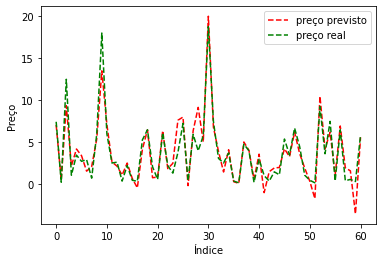

In [31]:
plt.plot(range(y_pred.shape[0]), y_pred,'r--')
plt.plot(range(y_test.shape[0]), y_test,'g--')
plt.legend(['preço previsto', 'preço real'])
plt.ylabel('Preço')
plt.xlabel('Índice')

plt.show()

É possível observar no gráfico que o modelo, em alguns casos tende a prever preços mais baixos do que o preço real de venda.

Abaixo vamos importar um metrica para ver o quão bom foi a acertividade do nosso modelo. É importante ressaltar que nessa medição quanto mais proximode 1 for o r2_score melhor será as previsões feitas pelo o modelo 

In [32]:
from sklearn.metrics import r2_score

print('R2-score: ', r2_score(y_test, y_pred))

R2-score:  0.8575849031703812
